In [1]:
%matplotlib inline

import tensorflow as tf

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

import numpy as np
from numpy.random import seed, randint

C:\Users\frbj\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Getting the data

This digit is 6


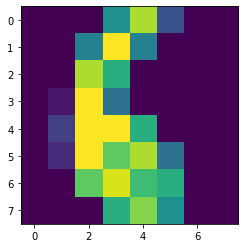

In [9]:
digits = load_digits()

a = randint(low = 0, high = 1796)
plt.imshow(digits.images[a])
print("This digit is {}".format(digits.target[a]))

# Training the neural network

In [15]:
num_classes = 10
X = digits.data
y = digits.target
Y = to_categorical(y, num_classes)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y)
input_size = X[0].shape[0]

In [51]:
seed(0)
tf.random.set_seed(0)

model = Sequential() #initialize neural network
model.add(Dense(units = 30, activation = 'sigmoid', input_dim = input_size)) #add the first hidden layer
model.add(Dense(units = num_classes, activation = 'softmax')) #output layer

sgd = optimizers.SGD(learning_rate = 0.1)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

history = model.fit(X_train, Y_train, epochs = 40, batch_size = 50, validation_split = 0.2, verbose = 1)

Epoch 1/40
22/22 [==============================] - 1s 12ms/step - loss: 2.0533 - accuracy: 0.3547 - val_loss: 1.7212 - val_accuracy: 0.5667
Epoch 2/40
22/22 [==============================] - 0s 4ms/step - loss: 1.4815 - accuracy: 0.7354 - val_loss: 1.3276 - val_accuracy: 0.8148
Epoch 3/40
22/22 [==============================] - 0s 3ms/step - loss: 1.1673 - accuracy: 0.8524 - val_loss: 1.0852 - val_accuracy: 0.8259
Epoch 4/40
22/22 [==============================] - 0s 3ms/step - loss: 0.9565 - accuracy: 0.8858 - val_loss: 0.9238 - val_accuracy: 0.8593
Epoch 5/40
22/22 [==============================] - 0s 3ms/step - loss: 0.7994 - accuracy: 0.9006 - val_loss: 0.7915 - val_accuracy: 0.8667
Epoch 6/40
22/22 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.9146 - val_loss: 0.6833 - val_accuracy: 0.8852
Epoch 7/40
22/22 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.9248 - val_loss: 0.6035 - val_accuracy: 0.9148
Epoch 8/40
22/22 [=

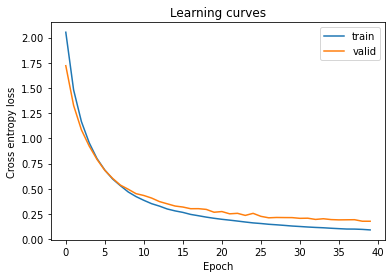

In [52]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

In [53]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train, Y_train)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test, Y_test)))

43/43 [==============================] - 0s 1ms/step - loss: 0.1067 - accuracy: 0.9874
Loss + accuracy on train data: [0.10665908455848694, 0.9873793721199036]
15/15 [==============================] - 0s 2ms/step - loss: 0.1541 - accuracy: 0.9711
Loss + accuracy on test data: [0.15407782793045044, 0.9711111187934875]


# Consider misclassified digits

In [41]:
probabilities = np.array(model.predict(X_test))
predictions = np.argmax(probabilities, axis = 1) #what does the model predict
labels = np.argmax(Y_test, axis = 1) #what are the actual labels

print("Predictions = {}".format(predictions[0:30]))
print("Labels      = {}".format(labels[0:30]))

15/15 [==============================] - 0s 1ms/step
Predictions = [7 5 0 4 8 6 0 4 6 6 6 9 0 5 9 1 5 9 1 0 4 2 6 4 3 5 5 0 3 6]
Labels      = [4 5 0 4 9 6 0 4 6 6 6 9 0 5 9 1 5 9 1 0 4 2 6 4 3 5 5 0 3 6]


This digit is 2, but classified as 3.


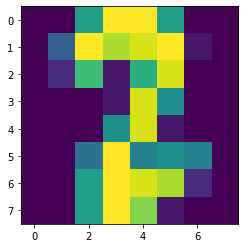

In [42]:
misclas_idxs = np.argwhere(predictions != labels)

b = randint(low = 0, high = len(misclas_idxs) - 1) #choose a random index
a = misclas_idxs[b][0] # find out what image that index is
plt.imshow(np.reshape(X_test[a], (8,8)))
print("This digit is {}, but classified as {}.".format(labels[a], predictions[a]))